In [31]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Cargar datos - Ahora debería ser un array JSON válido
print("📂 Cargando filtered_recipes.json...")
with open('filtered_recipes111.json', 'r', encoding='utf-8') as f:
    recipes = json.load(f)

# Crear DataFrame
df = pd.DataFrame(recipes)

# Eliminar duplicados por ID
initial_count = len(df)
df = df.drop_duplicates(subset=['id'], keep='first')
duplicates_removed = initial_count - len(df)

print(f"✓ Recetas iniciales: {initial_count}")
if duplicates_removed > 0:
    print(f"🗑️  Duplicados eliminados: {duplicates_removed}")
    
    # Guardar DataFrame limpio de vuelta al archivo JSON
    recipes_cleaned = df.to_dict('records')
    with open('filtered_recipes111.json', 'w', encoding='utf-8') as f:
        json.dump(recipes_cleaned, f, ensure_ascii=False, indent=2)
    print(f"💾 Archivo actualizado sin duplicados")
    
print(f"✓ Total de recetas únicas: {len(df)}")
print(f"✓ Columnas: {', '.join(df.columns)}")

📂 Cargando filtered_recipes.json...
✓ Recetas iniciales: 1293
🗑️  Duplicados eliminados: 205
💾 Archivo actualizado sin duplicados
✓ Total de recetas únicas: 1088
✓ Columnas: id, title, servings, pricePerServing, priceCalculated, dishClass, mealTypes, winePairing, vegan, glutenFree, vegetarian, dairyFree, isKosher, isHalal, restrictions, ingredients, seasons, seasonText
💾 Archivo actualizado sin duplicados
✓ Total de recetas únicas: 1088
✓ Columnas: id, title, servings, pricePerServing, priceCalculated, dishClass, mealTypes, winePairing, vegan, glutenFree, vegetarian, dairyFree, isKosher, isHalal, restrictions, ingredients, seasons, seasonText


## 1️⃣ Resumen General de Datos

In [19]:
# Información básica
print("="*60)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*60)
print(f"Número de recetas: {len(df)}")
print(f"Número de columnas: {len(df.columns)}")
print(f"\nColumnas disponibles:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col:20s} - Tipo: {df[col].dtype}")

print("\n" + "="*60)
print("VALORES FALTANTES")
print("="*60)
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Faltantes': missing, 'Porcentaje': missing_pct})
print(missing_df[missing_df['Faltantes'] > 0])

INFORMACIÓN GENERAL DEL DATASET
Número de recetas: 194
Número de columnas: 18

Columnas disponibles:
   1. id                   - Tipo: int64
   2. title                - Tipo: object
   3. servings             - Tipo: int64
   4. pricePerServing      - Tipo: float64
   5. priceCalculated      - Tipo: float64
   6. dishClass            - Tipo: object
   7. mealTypes            - Tipo: object
   8. winePairing          - Tipo: object
   9. vegan                - Tipo: bool
  10. glutenFree           - Tipo: bool
  11. vegetarian           - Tipo: bool
  12. dairyFree            - Tipo: bool
  13. isKosher             - Tipo: bool
  14. isHalal              - Tipo: bool
  15. restrictions         - Tipo: object
  16. ingredients          - Tipo: object
  17. seasons              - Tipo: object
  18. seasonText           - Tipo: object

VALORES FALTANTES
Empty DataFrame
Columns: [Faltantes, Porcentaje]
Index: []


## 2️⃣ Variables Numéricas - Estadísticas y Distribuciones

Variables numéricas encontradas: ['id', 'servings', 'pricePerServing', 'priceCalculated']

ESTADÍSTICAS DESCRIPTIVAS
                 count       mean       std        min        25%        50%  \
id               348.0  670397.66  89450.44  157344.00  640727.50  649944.00   
servings         348.0       7.68      9.25       1.00       4.00       6.00   
pricePerServing  348.0     201.12    291.20       0.00      71.96     143.05   
priceCalculated  160.0      79.17    249.24       0.23       4.12      15.71   

                       75%         max  missing  unique  
id               661757.00  1098393.00        1     249  
servings              8.00      100.00        1      25  
pricePerServing     226.20     3207.12        1     246  
priceCalculated      49.54     2499.73      189     141  


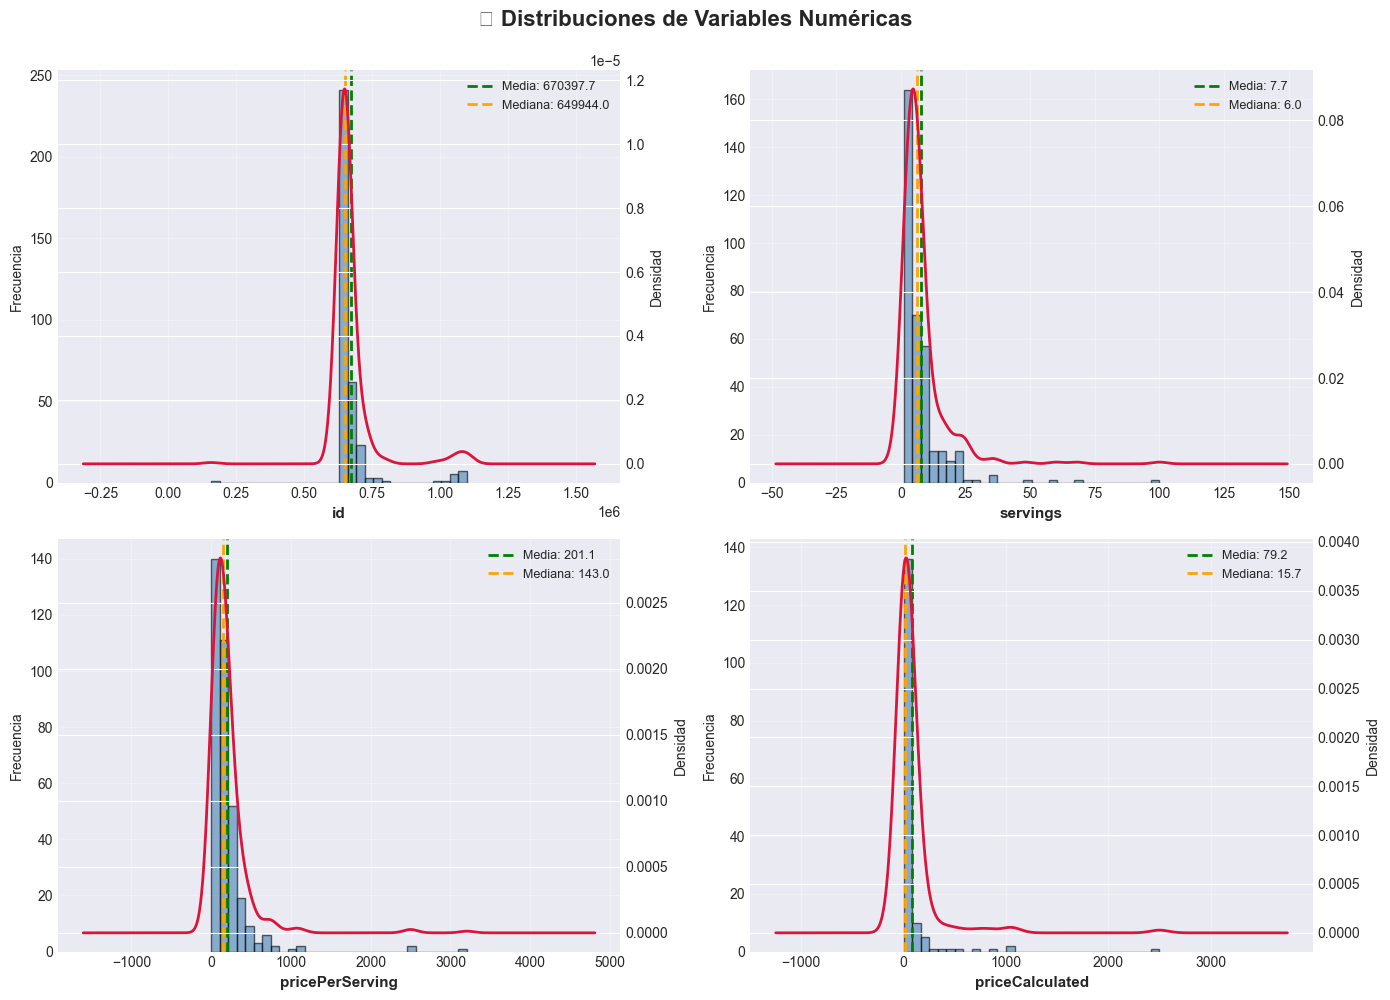

In [10]:
# Identificar variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Variables numéricas encontradas: {numeric_cols}\n")

# Estadísticas descriptivas
print("="*80)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("="*80)
stats = df[numeric_cols].describe().T
stats['missing'] = df[numeric_cols].isnull().sum()
stats['unique'] = df[numeric_cols].nunique()
print(stats.round(2))

# Gráficas de distribución para cada variable numérica
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('📊 Distribuciones de Variables Numéricas', fontsize=16, fontweight='bold', y=0.995)

for idx, col in enumerate(numeric_cols[:4]):  # Máximo 4 gráficas
    ax = axes[idx // 2, idx % 2]
    
    # Histograma + KDE
    df[col].hist(bins=30, ax=ax, alpha=0.6, color='steelblue', edgecolor='black')
    ax2 = ax.twinx()
    df[col].plot(kind='kde', ax=ax2, color='crimson', linewidth=2)
    
    # Estadísticas
    mean_val = df[col].mean()
    median_val = df[col].median()
    
    ax.axvline(mean_val, color='green', linestyle='--', linewidth=2, label=f'Media: {mean_val:.1f}')
    ax.axvline(median_val, color='orange', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.1f}')
    
    ax.set_xlabel(col, fontsize=11, fontweight='bold')
    ax.set_ylabel('Frecuencia', fontsize=10)
    ax2.set_ylabel('Densidad', fontsize=10)
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 3️⃣ Variables Categóricas - Frecuencias

DISTRIBUCIÓN DE RESTRICCIONES DIETÉTICAS

VEGAN:
  False:  169 (87.11%)
  True:   25 (12.89%)

GLUTENFREE:
  True:  102 (52.58%)
  False:   92 (47.42%)

VEGETARIAN:
  False:  126 (64.95%)
  True:   68 (35.05%)


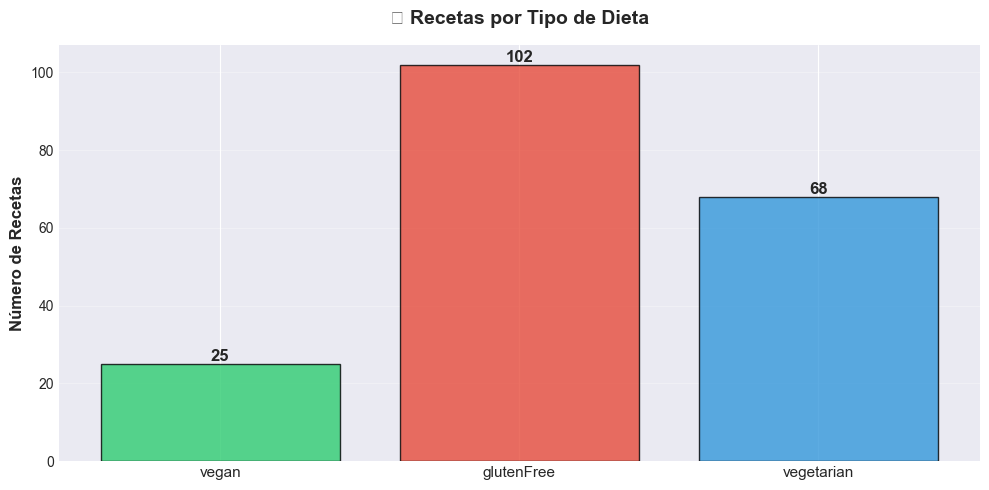

In [20]:
# Variables booleanas
bool_cols = ['vegan', 'glutenFree', 'vegetarian']
print("="*60)
print("DISTRIBUCIÓN DE RESTRICCIONES DIETÉTICAS")
print("="*60)
for col in bool_cols:
    if col in df.columns:
        counts = df[col].value_counts()
        pct = (counts / len(df) * 100).round(2)
        print(f"\n{col.upper()}:")
        for val, count in counts.items():
            print(f"  {val}: {count:4d} ({pct[val]:5.2f}%)")

# Gráfica de barras para booleanos
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
bool_data = df[bool_cols].sum()
colors = ['#2ecc71', '#e74c3c', '#3498db']
bars = ax.bar(bool_data.index, bool_data.values, color=colors, alpha=0.8, edgecolor='black')

# Añadir valores sobre las barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Número de Recetas', fontsize=12, fontweight='bold')
ax.set_title('🥗 Recetas por Tipo de Dieta', fontsize=14, fontweight='bold', pad=15)
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()

## 4️⃣ Análisis de Listas (diets, mealTypes, winePairing)

ANÁLISIS DE CAMPOS DE LISTA

MEALTYPES
Total de valores únicos: 24

Top 10 más frecuentes:
  lunch, main course, main dish, dinner:   43 (22.16%)
  dessert                       :   28 (14.43%)
  side dish                     :   26 (13.40%)
  morning meal, brunch, breakfast:   15 ( 7.73%)
  soup, lunch, main course, main dish, dinner:   12 ( 6.19%)
  side dish, lunch, main course, main dish, dinner:   11 ( 5.67%)
  antipasti, starter, snack, appetizer, antipasto, hor d'oeuvre:   10 ( 5.15%)
  antipasti, soup, starter, snack, appetizer, antipasto, hor d'oeuvre:    9 ( 4.64%)
  beverage, drink               :    5 ( 2.58%)
  fingerfood, antipasti, starter, snack, appetizer, antipasto, hor d'oeuvre:    3 ( 1.55%)

RESTRICTIONS
Total de valores únicos: 4

Top 10 más frecuentes:
  gluten free                   :  102 (52.58%)
  dairy free                    :   84 (43.30%)
  vegetarian                    :   68 (35.05%)
  vegan                         :   25 (12.89%)


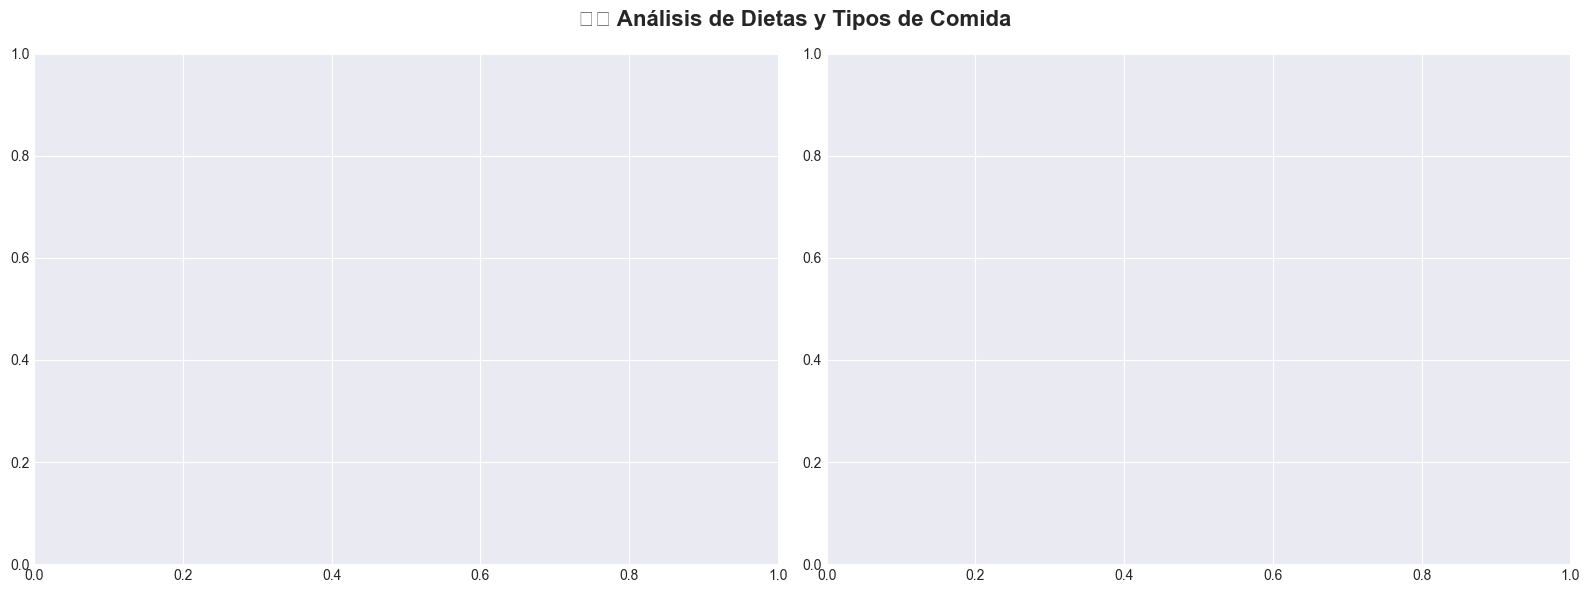


VALORES ÚNICOS DENTRO DE CADA VARIABLE

MEALTYPES - Valores únicos (24):
  - antipasti, lunch, main course, starter, snack, appetizer, main dish, antipasto, hor d'oeuvre, dinner
  - antipasti, morning meal, starter, brunch, snack, appetizer, breakfast, antipasto, hor d'oeuvre
  - antipasti, soup, starter, snack, appetizer, antipasto, hor d'oeuvre
  - antipasti, starter, snack, appetizer, antipasto, hor d'oeuvre
  - beverage, drink
  - bread
  - condiment, dip, sauce, spread
  - condiment, dip, spread
  - dessert
  - fingerfood, antipasti, bread, starter, snack, appetizer, antipasto, hor d'oeuvre
  - fingerfood, antipasti, lunch, main course, starter, snack, appetizer, main dish, antipasto, hor d'oeuvre, dinner
  - fingerfood, antipasti, starter, snack, appetizer, antipasto, hor d'oeuvre
  - lunch, main course, main dish, dinner
  - lunch, main course, morning meal, brunch, main dish, breakfast, dinner
  - morning meal, brunch, beverage, breakfast, drink
  - morning meal, brunch, break

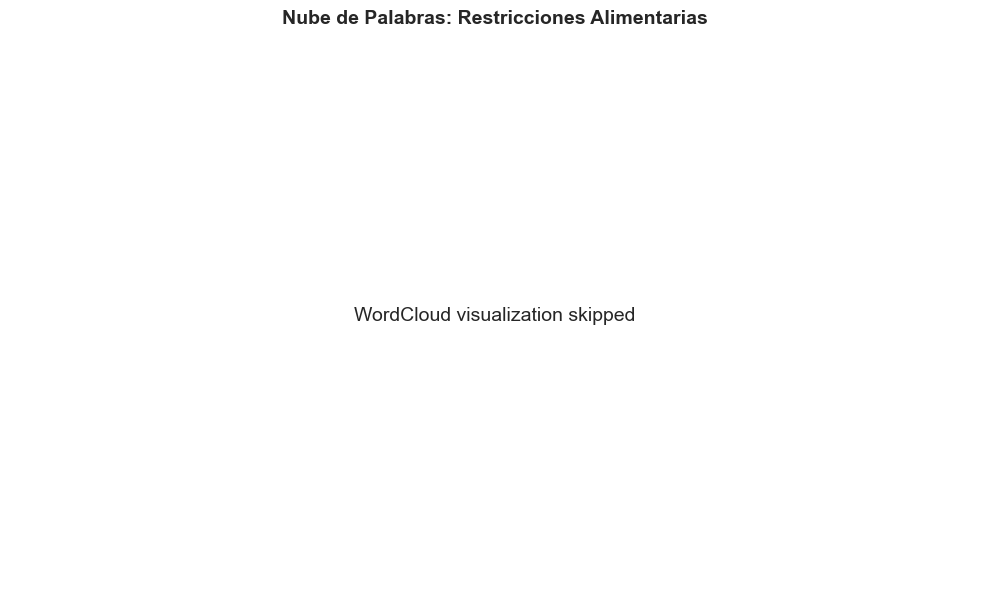

In [28]:
# Análisis de campos tipo lista
list_cols = ['diets', 'mealTypes', 'restrictions']

print("="*80)
print("ANÁLISIS DE CAMPOS DE LISTA")
print("="*80)

for col in list_cols:
    if col in df.columns:
        print(f"\n{'='*80}")
        print(f"{col.upper()}")
        print(f"{'='*80}")
        
        # Extraer todos los valores
        all_values = []
        for val in df[col].dropna():
            if isinstance(val, list):
                all_values.extend(val)
            elif isinstance(val, str) and val:
                all_values.append(val)
        
        if all_values:
            counter = Counter(all_values)
            print(f"Total de valores únicos: {len(counter)}")
            print(f"\nTop 10 más frecuentes:")
            for item, count in counter.most_common(10):
                pct = (count / len(df) * 100)
                print(f"  {item:30s}: {count:4d} ({pct:5.2f}%)")
        else:
            print("  (vacío o sin datos)")

# Gráfica de dietas y tipos de comida
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('🍽️ Análisis de Dietas y Tipos de Comida', fontsize=16, fontweight='bold')

# DIETAS
if 'diets' in df.columns:
    diets_all = []
    for val in df['diets'].dropna():
        if isinstance(val, list):
            diets_all.extend(val)
    
    if diets_all:
        diet_counter = Counter(diets_all)
        top_diets = dict(diet_counter.most_common(10))
        
        ax1.barh(list(top_diets.keys()), list(top_diets.values()), color='coral', alpha=0.8, edgecolor='black')
        ax1.set_xlabel('Frecuencia', fontsize=11, fontweight='bold')
        ax1.set_title('Top 10 Dietas', fontsize=13, fontweight='bold')
        ax1.grid(axis='x', alpha=0.3)

# TIPOS DE COMIDA
if 'mealTypes' in df.columns:
    meals_all = []
    for val in df['mealTypes'].dropna():
        if isinstance(val, list):
            meals_all.extend(val)
    
    if meals_all:
        meal_counter = Counter(meals_all)
        top_meals = dict(meal_counter.most_common(10))
        
        ax2.barh(list(top_meals.keys()), list(top_meals.values()), color='skyblue', alpha=0.8, edgecolor='black')
        ax2.set_xlabel('Frecuencia', fontsize=11, fontweight='bold')
        ax2.set_title('Top 10 Tipos de Comida', fontsize=13, fontweight='bold')
        ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()
# Análisis de valores únicos por cada columna de listas
print("\n" + "="*80)
print("VALORES ÚNICOS DENTRO DE CADA VARIABLE")
print("="*80)

for col in list_cols:
    if col in df.columns:
        # Extraer todos los valores únicos
        unique_values = set()
        for val in df[col].dropna():
            if isinstance(val, list):
                unique_values.update(val)
            elif isinstance(val, str) and val:
                unique_values.add(val)
        
        print(f"\n{col.upper()} - Valores únicos ({len(unique_values)}):")
        for value in sorted(unique_values):
            print(f"  - {value}")

# Visualización adicional: Treemap de los valores de dietas
if 'diets' in df.columns:
    plt.figure(figsize=(10, 6))
    diets_all = []
    for val in df['diets'].dropna():
        if isinstance(val, list):
            diets_all.extend(val)
    
    if diets_all:
        diet_counter = Counter(diets_all)
        labels = list(diet_counter.keys())
        sizes = list(diet_counter.values())
        colors = plt.cm.viridis(np.linspace(0, 0.8, len(labels)))
        
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', 
                startangle=90, colors=colors, 
                wedgeprops={'edgecolor': 'white', 'linewidth': 1})
        plt.axis('equal')
        plt.title('Distribución de Tipos de Dietas', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()

# Nube de palabras para restricciones
if 'restrictions' in df.columns:
    plt.figure(figsize=(10, 6))
    restrictions_all = []
    for val in df['restrictions'].dropna():
        if isinstance(val, list):
            restrictions_all.extend(val)
    
    if restrictions_all:
        
        restriction_text = ' '.join(restrictions_all)
        #wordcloud = WordCloud(width=800, height=400, background_color='white', 
                            # colormap='viridis', max_words=100).generate(restriction_text)
        
        # We'll skip the wordcloud visualization and just display a message
        plt.text(0.5, 0.5, "WordCloud visualization skipped", 
            ha='center', va='center', fontsize=14)
        plt.axis('off')
        plt.title('Nube de Palabras: Restricciones Alimentarias', 
                 fontsize=14, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()


## 5️⃣ Correlaciones y Boxplots

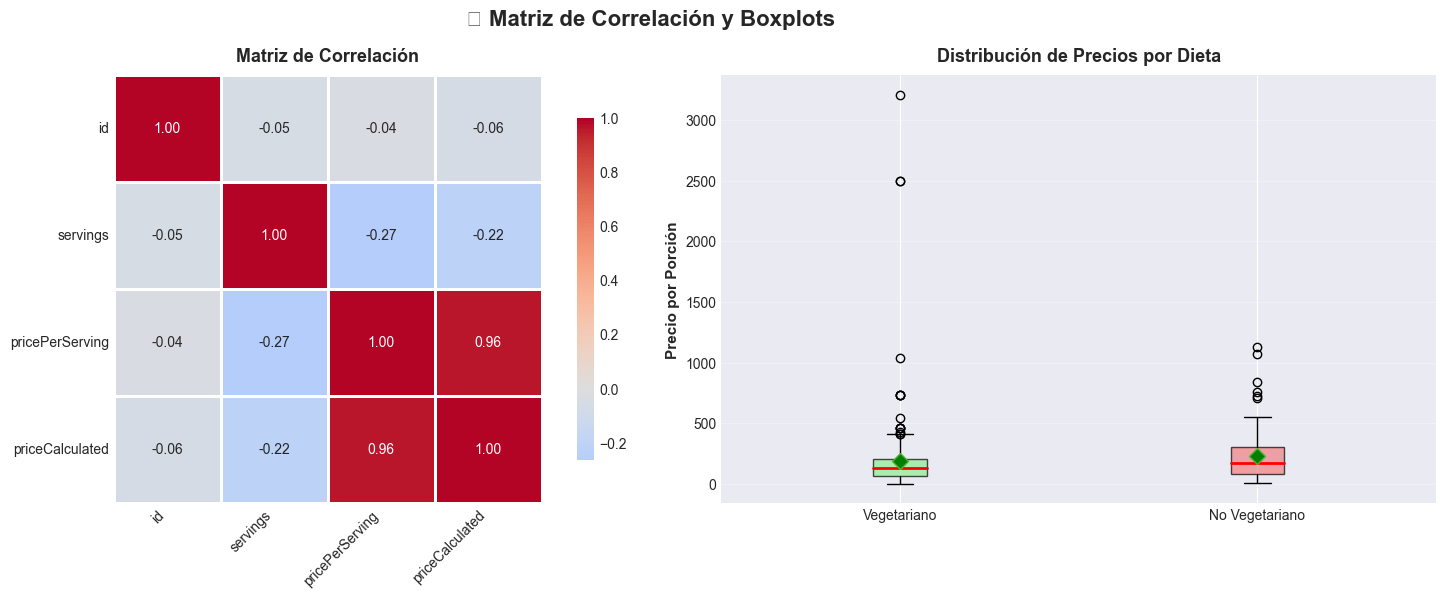

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('📈 Matriz de Correlación y Boxplots', fontsize=16, fontweight='bold')

# MATRIZ DE CORRELACIÓN
if len(numeric_cols) > 1:
    corr_matrix = df[numeric_cols].corr()
    
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, ax=ax1, cbar_kws={'shrink': 0.8},
                linewidths=1, linecolor='white')
    ax1.set_title('Matriz de Correlación', fontsize=13, fontweight='bold', pad=10)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
    ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)

# BOXPLOT DE PRECIO POR TIPO DE DIETA
if 'pricePerServing' in df.columns and 'vegetarian' in df.columns:
    box_data = [
        df[df['vegetarian'] == True]['pricePerServing'].dropna(),
        df[df['vegetarian'] == False]['pricePerServing'].dropna()
    ]
    
    bp = ax2.boxplot(box_data, labels=['Vegetariano', 'No Vegetariano'],
                     patch_artist=True, showmeans=True,
                     medianprops=dict(color='red', linewidth=2),
                     meanprops=dict(marker='D', markerfacecolor='green', markersize=8))
    
    colors = ['lightgreen', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax2.set_ylabel('Precio por Porción', fontsize=11, fontweight='bold')
    ax2.set_title('Distribución de Precios por Dieta', fontsize=13, fontweight='bold', pad=10)
    ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 6️⃣ Resumen Final y Exportación

In [ ]:
# Crear resumen consolidado
summary = {
    'Total_Recetas': len(df),
    'Recetas_Veganas': df['vegan'].sum() if 'vegan' in df.columns else 0,
    'Recetas_Vegetarianas': df['vegetarian'].sum() if 'vegetarian' in df.columns else 0,
    'Recetas_Sin_Gluten': df['glutenFree'].sum() if 'glutenFree' in df.columns else 0,
    'Precio_Promedio': df['pricePerServing'].mean() if 'pricePerServing' in df.columns else 0,
    'Precio_Mediano': df['pricePerServing'].median() if 'pricePerServing' in df.columns else 0,
    'Servings_Promedio': df['servings'].mean() if 'servings' in df.columns else 0,
    'Servings_Mediano': df['servings'].median() if 'servings' in df.columns else 0
}

print("\n" + "="*80)
print("📋 RESUMEN EJECUTIVO DEL DATASET")
print("="*80)
for key, value in summary.items():
    if isinstance(value, float):
        print(f"{key.replace('_', ' '):30s}: {value:8.2f}")
    else:
        print(f"{key.replace('_', ' '):30s}: {value:8d}")

# Exportar resumen a CSV
summary_df = pd.DataFrame([summary])
summary_df.to_csv('recipe_summary.csv', index=False)
print("\n✓ Resumen exportado a 'recipe_summary.csv'")

# Mostrar primeras filas del dataset
print("\n" + "="*80)
print("📄 PRIMERAS 5 RECETAS")
print("="*80)
print(df.head())